<a href="https://colab.research.google.com/github/Wildwolf4541/TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow
There are many definitions for a regression problem but in our case, we are going to simplify it: predicting a numerical variable based on some other combination of variables

In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.19.0


## Creating some data to view and fit

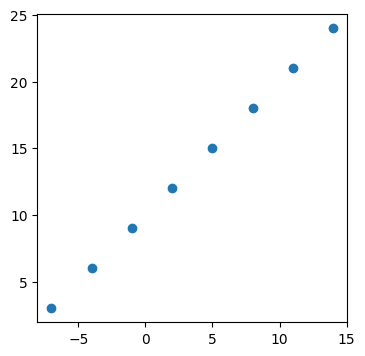

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize
plt.figure(figsize=(4, 4))
plt.scatter(X,y)

In [3]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [4]:
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [5]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [6]:
# we need to build a model to figure the relation between X and y.

**# Steps in modelling in TensorFLow**
1. **Creating a model-** define the input , hidden and output layers
2. **Compile the model-**
    > define the loss funciton(tells our model how wrong it is)

    > the optimizer(tells our model how to improve the patters in its learning)
    
    > the evaluation metrics(what we can use to interpret the performance of our model).
3. **Fitting the model-** letting the model try to find patterns between X and y ( features and labels).

In [7]:
tf.random.set_seed(42)

# Create a model using SEQUENTIAL API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,))
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(X,y,epochs=5)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - loss: 21.0855 - mae: 21.0855
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 20.6923 - mae: 20.6923
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 20.3480 - mae: 20.3480
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 20.0668 - mae: 20.0668
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 19.7855 - mae: 19.7855


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [9]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
model.predict(tf.constant([[17.0]])) # The answer should be 27.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[-21.91744]], dtype=float32)

## Improving our model
We can improve by altering the steps we took to create a model.
1. **Creating a model-** We might add more layers,
increase no. of neurons each layer, change the activation functions.

2. **Compiling the model-** We might change the optimization function or learning rate of it

3. **Fitting the model-** We might fit with more epochs or on more data.

In [11]:
# Let's recreate by increasing the epochs

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,))
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - loss: 7.6579 - mae: 7.6579
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 7.5254 - mae: 7.5254
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.4850 - mae: 7.4850
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 7.4794 - mae: 7.4794
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.4737 - mae: 7.4737
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.4681 - mae: 7.4681
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.4625 - mae: 7.4625
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.4569 - mae: 7.4569
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.4513 - mae: 7.4513
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.4456 - mae: 7.4456
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.4400 - mae: 7.4400
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.4344 - mae: 7.4344
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/st

In [12]:
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[30.321127]], dtype=float32)

This improved a lot than before.

In [13]:
# Let's add more layers to it.

model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(1,), activation="relu"),
    tf.keras.layers.Dense(1,input_shape=(1,))
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step - loss: 13.7858 - mae: 13.7858
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 13.3584 - mae: 13.3584
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 12.9315 - mae: 12.9315
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 12.5014 - mae: 12.5014
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 12.0644 - mae: 12.0644
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 11.6179 - mae: 11.6179
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 11.1575 - mae: 11.1575
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.6858 - mae: 10.6858
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.1906 - mae: 10.1906
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.6692 - mae: 9.6692
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.1260 - mae: 9.1260
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 8.5469 - mae: 8.5469
Epoch 13/100
1/1 ━━━━━━━━━━

In [14]:
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[32.097454]], dtype=float32)

Our previous model dit better.
The model must be overfitting. Not all the improvements give a good result.

In [15]:
# Let's change optimizer this time.

model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,input_shape=(1,)),
    tf.keras.layers.Dense(1,input_shape=(1,))
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step - loss: 13.3100 - mae: 13.3100
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 12.5959 - mae: 12.5959
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 11.8759 - mae: 11.8759
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.1485 - mae: 11.1485
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.4122 - mae: 10.4122
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 9.6658 - mae: 9.6658
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.9075 - mae: 8.9075
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.1353 - mae: 8.1353
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.3469 - mae: 7.3469
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 6.7552 - mae: 6.7552
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 6.8684 - mae: 6.8684
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.1586 - mae: 7.1586
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [16]:
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[26.427622]], dtype=float32)

Alright, this one is pretty close to the expected and correct output. Well Done.

## Visualizing the Model.
Now that we evaluated the model by tweaking it many times, the next step is to **VISUALIZE IT.**

It is good to visualize-
* The data
* The model itself
* The training of the model
* The predictions of the model

In [17]:
# Make a bigger dataset.
X=tf.range(-100,100,4)
y=X+10
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

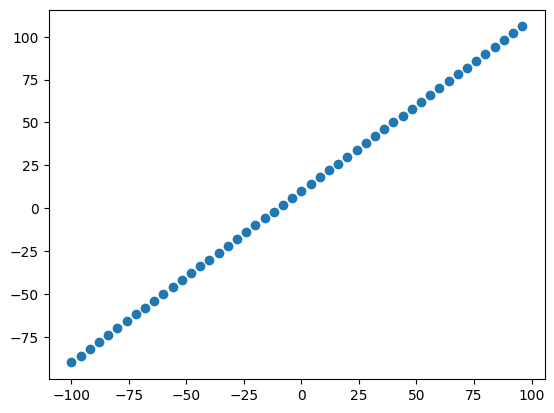

In [18]:
plt.scatter(X,y)

## **The 3 sets->**

* **Training set-** Model learns for this data. 70-80% of total data .
* **Validation set-** Model gets tuned on this data. 10-15 % of total data.
* **Test set-** Model gets evaluated on this data to test what it has learned. 10-15% of total data.

In [19]:
len(X), len(y)

(50, 50)

In [20]:
# Split the data into train and test sets.
X_train= X[:40]
y_train= y[:40]
X_test= X[40:]
y_test= y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

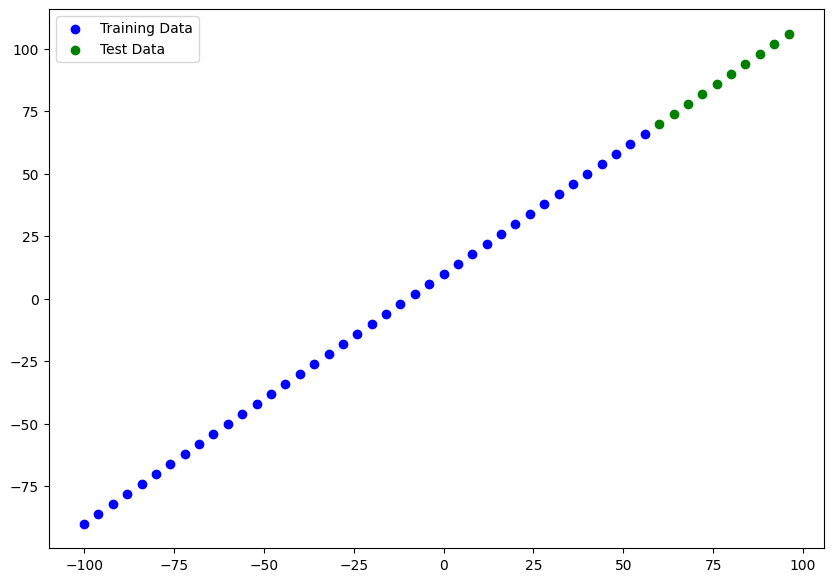

In [21]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train,y_train,c="b",label="Training Data")
plt.scatter(X_test,y_test,c="g",label="Test Data")
plt.legend()

In [22]:
model1 = tf.keras.Sequential(
    name="good_model",
    layers=[
        tf.keras.layers.Dense(10, input_shape=[1],name="input_layer"),
        tf.keras.layers.Dense(1,name="output_layer")
    ]
)

model1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
)


In [23]:
# Visualize the model before fitting.
model1.summary()

Model: "good_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
# 3. Fit
model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.9140 - mae: 1.9140 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.4797 - mae: 6.4797
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.5293 - mae: 6.5293
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.5103 - mae: 6.5103
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.7575 - mae: 5.7575
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.4937 - mae: 7.4937
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.4305 - mae: 1.4305
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.2668 - mae: 2.2668
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.3761 - mae: 1.3761
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4678 - mae: 0.4678
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4065 - mae: 2.4065
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3.4491 - mae: 3.4491
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/st

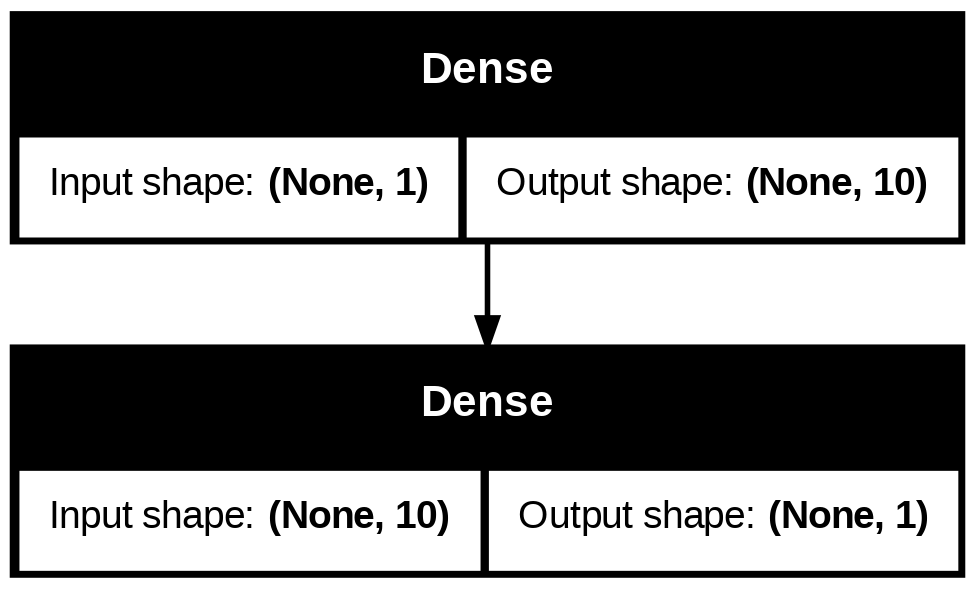

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model=model1, show_shapes=True)

## Visualing the model's predictions

it is a good idea to plot them against the group truth labels.

y_true v/s y_pred

In [26]:
y_test # Ground truth

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [27]:
y_pred=model1.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[30.435534],
       [32.46456 ],
       [34.4936  ],
       [36.522636],
       [38.551674],
       [40.580704],
       [42.609745],
       [44.638775],
       [46.667812],
       [48.696846]], dtype=float32)

In [28]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()

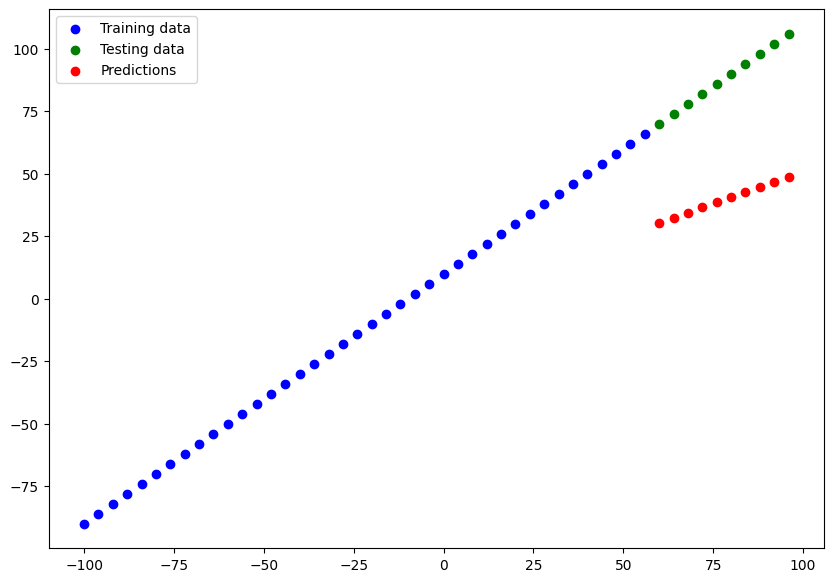

In [29]:
plot_predictions()

## Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

**MAE** — mean absolute error, "on average, how wrong is each of my model's predictions"

**MSE** — mean square error, "square the average errors"

In [30]:
model1.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 48.4338 - mae: 48.4338


[48.433815002441406, 48.433815002441406]

In [31]:
def mae(y_true, y_pred):
  """
  Calculates the mean absolute error between two arrays of numbers.
  """
  mae = tf.keras.metrics.MeanAbsoluteError()
  mae.update_state(y_test, y_pred)
  return mae.result()

In [32]:
def mse(y_true, y_pred):
  """
  Calculates the mean absolute error between two arrays of numbers.
  """
  mse = tf.keras.metrics.MeanSquaredError()
  mse.update_state(y_test, y_pred)
  return mse.result()

In [33]:
mae(y_test,y_pred), mse(y_test,y_pred)

(<tf.Tensor: shape=(), dtype=float32, numpy=48.433815002441406>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2377.883056640625>)

## Running experiments to improve a model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

**Get more data** - get more examples for your model to train on (more opportunities to learn patterns).

**Make your model larger** (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.

**Train for longer** - give your model more of a chance to find the patterns in the data.

Let's do 3 experiments-
1. model_1 - same as original model, 1 layer, trained for 100 epochs.

2. model_2 - 2 layers, trained for 100 epochs.

3. model_3 - 2 layers, trained for 500 epochs.

In [34]:
# Model 1
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,))
])
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_1.fit(X_train,y_train,epochs=100,verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


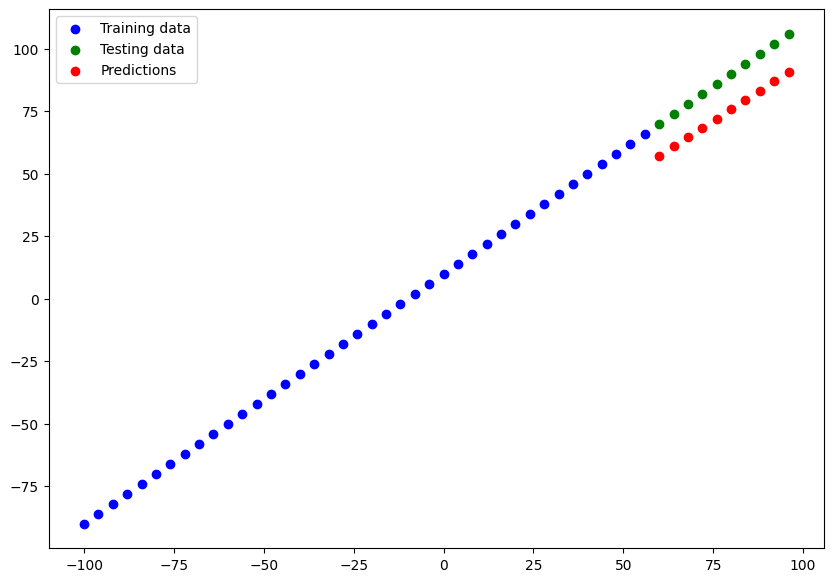

In [35]:
y_pred_1=model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [36]:
mae_1= mae(y_test,y_pred_1)
mse_1=mse(y_test,y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.053814888000488>,
 <tf.Tensor: shape=(), dtype=float32, numpy=198.15341186523438>)

In [37]:
# Model 2
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(1,input_shape=(1,))
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
model_2.fit(X_train,y_train,epochs=100,verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


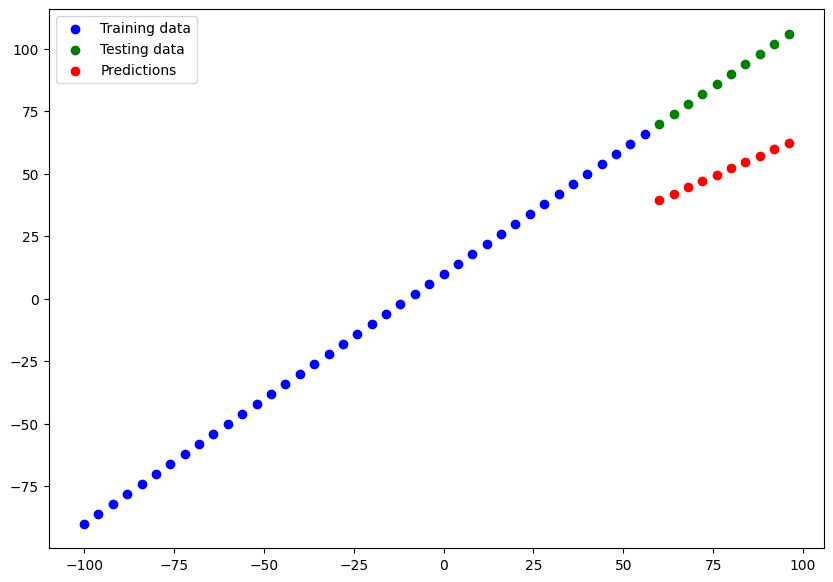

In [38]:
y_pred_2=model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [39]:
mae_2= mae(y_test,y_pred_2)
mse_2=mse(y_test,y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=37.050933837890625>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1390.6197509765625>)

In [40]:
# Model 3
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(1,input_shape=(1,))
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
model_3.fit(X_train,y_train,epochs=500,verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


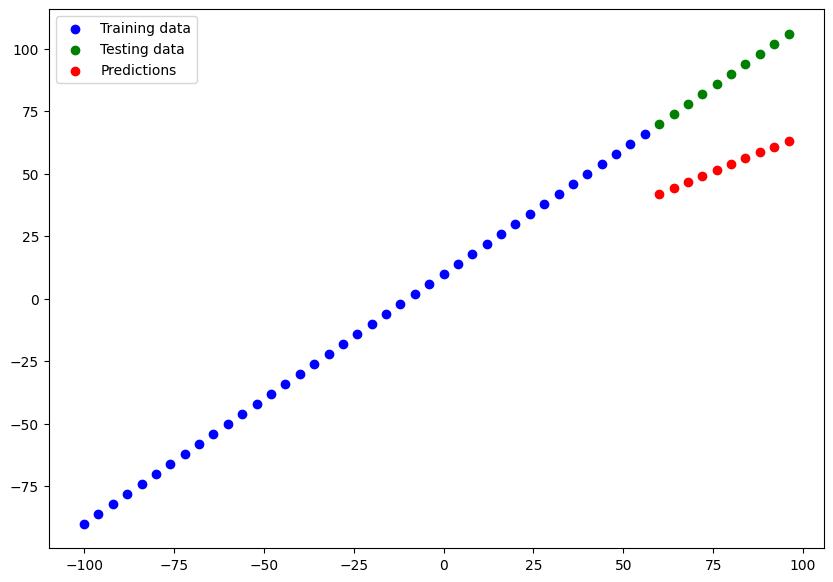

In [41]:
y_preds3= model_3.predict(X_test)
plot_predictions(predictions=y_preds3)

In [42]:
mae_3= mae(y_test,y_preds3)
mse_3=mse(y_test,y_preds3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=35.36199188232422>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1272.584716796875>)

## Comparing the results of our experiments

In [43]:
# Let's compare our model's results using a Pandas DataFrame
import pandas as pd
model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
               ["model_2",mae_2.numpy(),mse_2.numpy()],
               ["model_3",mae_3.numpy(),mse_3.numpy()],]
all_results=pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,14.053815,198.153412
1,model_2,37.050934,1390.619751
2,model_3,35.361992,1272.584717


## Saving our models.
This allows us to use our models outside of Google Colab and use it in various places such as web applications or mobile apps.

There are two formats-
1. The SavedModel Format
2. The HDF5 format

In [50]:
# SaveModel format
model_1.save("best_model_SaveModel_format.keras")

In [51]:
# HDF5 Format
model_1.save("best_model_HDF5_format.h5")

## Loading Our Models

In [46]:
# Loading the Models

loaded_model_1=tf.keras.models.load_model("best_model_SaveModel_format.keras")
loaded_model_2=tf.keras.models.load_model("best_model_HDF5_format.h5")

In [47]:
loaded_model_1.summary(), loaded_model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

(None, None)

## Downloading our model
Two ways ->
1. Manually from Files Tab
2. Code
3. Save to Google Drive by copying it there. !cp sourcepath destinationpath

In [48]:
from google.colab import files
files.download("best_model_SaveModel_format.keras")
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# END
Next go to 02_A_Larger_Example_Of_NN.ipynb